In [1]:
%run ../../macro_tQ.py
import sys
sys.path.append('../../')
import macro_tQ as tQ

import numpy as np
import scipy.linalg as la
from IPython.display import display,Markdown,Latex
import matplotlib.pyplot as plt
from qiskit.tools.visualization import array_to_latex

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from numpy import linalg as la
from qiskit.quantum_info import Statevector

'''definimos un estado de entrada en H^3$'''
psi =[1.,-2, -2,1,1,0,2,-1]
psi/=la.norm(psi)
#psi = tQ.random_ket(8).reshape(8)


Statevector(psi).draw('Latex')

<IPython.core.display.Latex object>

/home/dcb/Programs/miniconda/miniconda3/envs/qiskit_qibo_penny/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


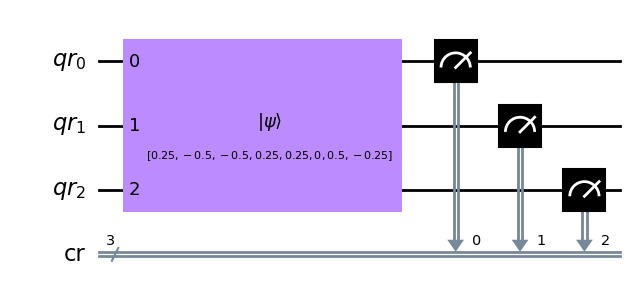

In [3]:
qr = QuantumRegister(3,name='qr')
cr = ClassicalRegister(3,name='cr')

qc = QuantumCircuit(qr,cr)
qc.initialize(psi,qr)


qc.measure(qr,cr)
#qc.measure(qr,reversed(list(cr)))  # esta opcion invierte la asignación de bits clasicos a cúbits
#qc.measure([qr[0],qr[1]],[cr[1],cr[2]])

qc.draw(output='mpl')

Cuentas= {'100': 6343, '000': 6300, '010': 24878, '110': 25089, '111': 6149, '011': 6189, '001': 25052}


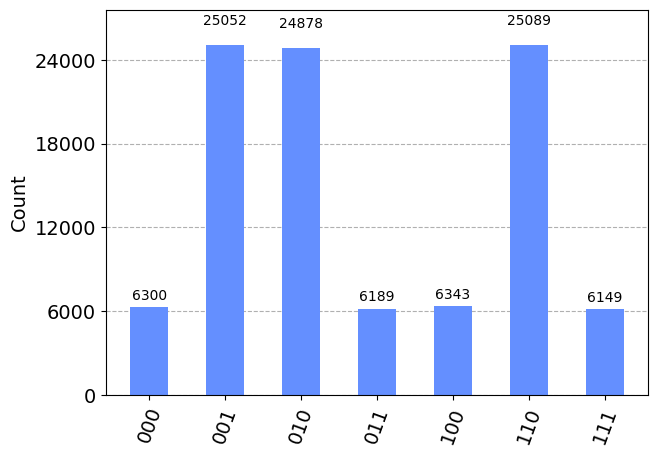

In [4]:
from qiskit import Aer, execute 
'definimos el simulador'
M_simulator = Aer.get_backend('qasm_simulator')
'numero todal de medidas'
nshots = 100000


'ejecutamos el circuito'
job=execute(qc,backend=M_simulator,shots=nshots) 
result=job.result()
counts = result.get_counts()        
print('Cuentas=',counts) #diccionario de cuentas


from qiskit.tools.visualization import plot_histogram
plot_histogram(counts) # Mostramos un histograma de resultados

In [5]:
def get_probs(counts): # frecuencias_dict es un diccionario con la estadística de resultados
   
    prob_dict=counts.copy() # vamos a modificar el diccionario "cuentas" con las probabilidades 
    keys = list(counts.keys())
    values = list(counts.values())
    
    N=sum(values)
    probabilidades = [v/N for v in values] # lista de frecuencias relativas
 
    for i in range(len(keys)):
        prob_dict[keys[i]]= probabilidades[i]
    
    return  prob_dict

probs  = get_probs(counts)

print("Probabilidades =",probs )



Probabilidades = {'100': 0.06343, '000': 0.063, '010': 0.24878, '110': 0.25089, '111': 0.06149, '011': 0.06189, '001': 0.25052}


In [6]:
def add_multimeasure_XYZ(qc,paulistring):

    assert(qc.num_qubits==len(paulistring)) #check whether width of circuit coincides with length of Pauli string

    for i,basis in enumerate(reversed(paulistring)):
        if  basis == 'X':
            qc.h(i)    
            qc.measure(i, i)
        elif basis == 'Z':
            qc.measure(i, i)
            pass    
        elif basis == 'Y':
            qc.sdg(i)
            qc.h(i)
            qc.measure(i, i)

    return qc 

/home/dcb/Programs/miniconda/miniconda3/envs/qiskit_qibo_penny/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


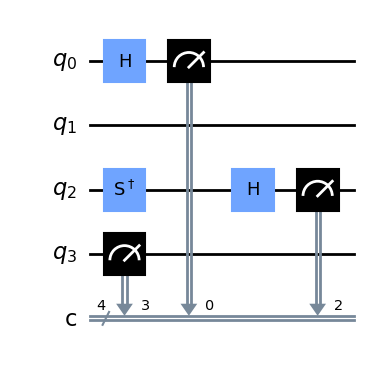

In [7]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(4,4)
add_multimeasure_XYZ(qc,'ZYIX')  # probar a cambiar el aparato de medida
qc.draw('mpl')

In [8]:
def add_Bell_measurement(qc,qubits=[0,1]):
    qc.cx(qubits[0],qubits[1])
    qc.h(0)
    qc.barrier()
    qc.measure([0,1],[1,0])

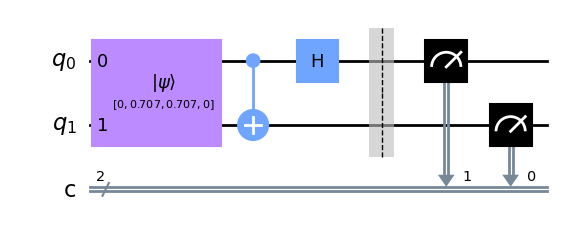

{'01': 1024}

In [9]:
from qiskit import QuantumCircuit

# creamos el circuito
qc = QuantumCircuit(2,2)

# definimos la base de Bell
B00 = np.array([1,0,0,1]/np.sqrt(2))
B01 = np.array([1,0,0,-1]/np.sqrt(2))
B10 = np.array([0,1,1,0]/np.sqrt(2))
B11 = np.array([0,1,-1,0]/np.sqrt(2))

# inicializamos el estado de entrada en cualquiera de los estados anteriores
qc.initialize(B10,[0,1])

# añadimos el medidor en la base de Bell
add_Bell_measurement(qc,[0,1])
display(qc.draw('mpl'))

execute(qc,backend=M_simulator).result().get_counts()

In [10]:
' Matrices de Pauli'
s0 = np.matrix([[1,0],[0,1]]) # matriz identidad
s1 = np.matrix([[0,1],[1,0]])
s2 = np.matrix([[0,-1j],[1j,0]])
s3 = np.matrix([[1,0],[0,-1]])

Pauli_basis = [s0,s1,s2,s3]

' Cadena de Pauli YIZ = s2s0s3' 
Pauli_string_203 = np.kron(s2,np.kron(s0,s3))
array_to_latex(Pauli_string_203)

<IPython.core.display.Latex object>

In [11]:
'Matriz arbitraria'
A = np.random.rand(8,8) + 1j* np.random.rand(8,8)

'Proyección'
a_203 = np.trace(np.dot(A,Pauli_string_203))/2**3

print('a_{203} = ', a_203)

a_{203} =  (0.0963610451972441+0.008337204610691831j)


In [12]:
' estado '
psi =np.array([1.,-2*1J, -2,1,1J,0,2,-1])
psi/=tQ.norm(psi)

#e_init = tq_random_ket(8).reshape(8)

Statevector(psi).draw('latex')

<IPython.core.display.Latex object>

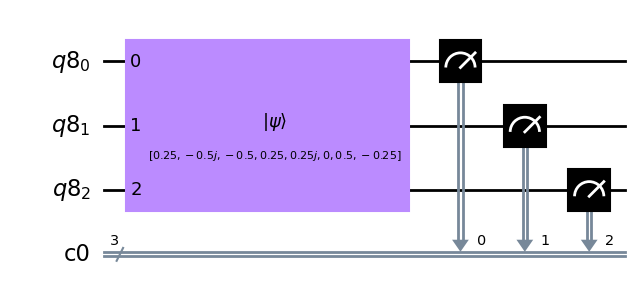

In [13]:
qr = QuantumRegister(3)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr,cr)

from qiskit.extensions import Initialize

qc.initialize(psi, qr)
qc.measure(qr,cr)
qc.draw(output='mpl')

In [14]:
M_backend = Aer.get_backend('qasm_simulator')
shots=100000

counts = execute(qc,M_backend,shots=shots).result().get_counts()
print(counts)

#from qiskit.tools.visualization import plot_histogram
#plot_histogram(counts)

{'100': 6210, '110': 25098, '011': 6171, '111': 6230, '001': 25100, '000': 6207, '010': 24984}


In [15]:
mean = 0
for bitstring,count  in counts.items():
    mean += (-1)**(sum([int(bit) for bit in bitstring])) * count/nshots 

print('<ZZZ> =', np.round(mean,5) )

<ZZZ> = -0.25048


In [16]:
Z = np.array([[1,0],[0,-1]])
ZZZ = np.kron(Z,np.kron(Z,Z))
tQ.braket(psi,np.dot(ZZZ,psi))

(-0.25+0j)

In [17]:
variance=0
for bitstring,count  in counts.items():
    variance += ((-1)**(sum([int(bit) for bit in bitstring]))-mean)**2 * count/nshots 
    
print('sigma = ', np.sqrt(variance) )

sigma =  0.9681217741586025


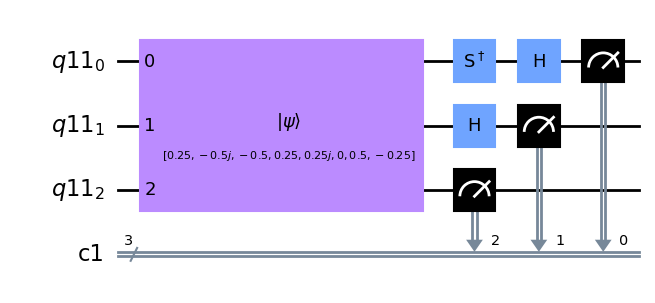

In [18]:
qr = QuantumRegister(3)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr,cr)

from qiskit.extensions import Initialize

qc.initialize(psi, qr)
add_multimeasure_XYZ(qc,'ZXY')
qc.draw(output='mpl')

In [19]:
counts = execute(qc,M_backend,shots=shots).result().get_counts()
print(counts)

mean = 0
for bitstring,count  in counts.items():
    mean += (-1)**(sum([int(bit) for bit in bitstring])) * count/nshots 

print('<ZXY> =', np.round(mean,5) )

{'001': 3124, '101': 6195, '110': 6153, '100': 12242, '111': 12540, '011': 40956, '010': 3114, '000': 15676}
<ZXY> = 0.3796


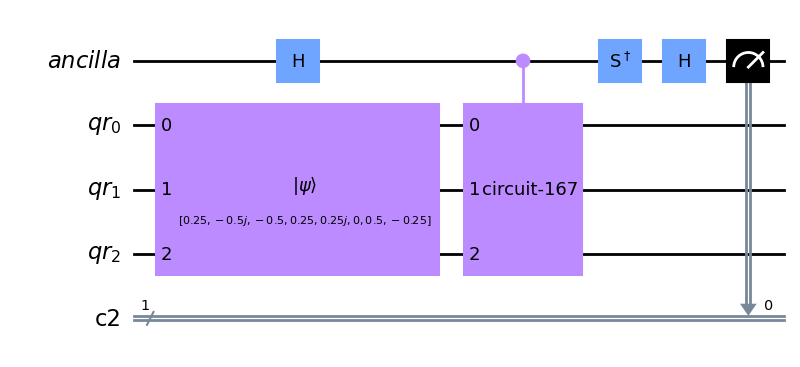

In [20]:
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister

qr = QuantumRegister(3, name = 'qr')
qra = QuantumRegister(1, name = 'ancilla')
cr = ClassicalRegister(1)

'creamos el operador como una puerta "gate" que admite el método "control'
qc0 = QuantumCircuit(qr)
qc0.z(qr)
CZZZ_gate = qc0.to_gate().control(1,ctrl_state= 1) 

'creamos el circuito con el operador controlado'
qc_Had = QuantumCircuit(qra,qr,cr)
qc_Had.initialize(psi,qr)
qc_Had.h(qra)  
qc_Had.append(CZZZ_gate,qra[:] + qr[:])
qc_Had.sdg(qra)
qc_Had.h(qra)
qc_Had.measure(qra,cr)

qc_Had.draw('mpl')

{'0': 500320, '1': 499680}


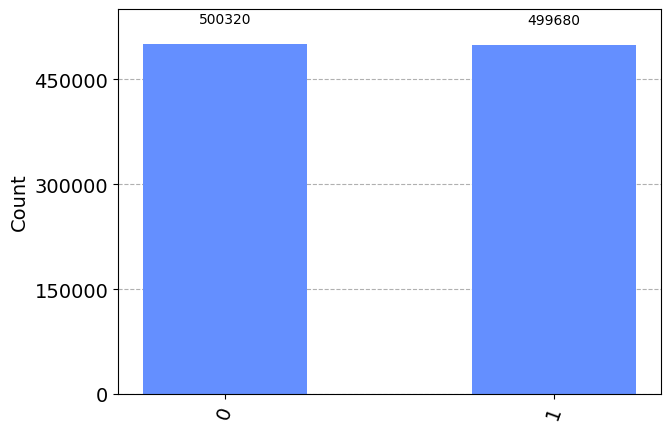

In [21]:
M_backend = Aer.get_backend('qasm_simulator')
shots=1000000

cuentas_Had= execute(qc_Had,M_backend,shots=shots).result().get_counts()
print(cuentas_Had)

from qiskit.tools.visualization import plot_histogram
plot_histogram(cuentas_Had)

In [22]:
val_esp_sigma(cuentas_Had)

NameError: name 'val_esp_sigma' is not defined